In [1]:
import requests
import statistics 
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')

In [2]:
url = 'https://api.covid19india.org/states_daily.json'
r1 = requests.get(url)
dictr1 = r1.json()

In [3]:
df_india = pd.DataFrame(dictr1['states_daily'])
df_india.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [4]:
df_india['date']=pd.to_datetime(df_india['date'])
df_india['date']=df_india['date'].dt.date
df_india

,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,2020-03-14,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,2020-03-14,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,2020-03-15,0,1,...,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,108,8061,73,2054,3838,108,338,2020-08-19,0,1320,...,34,Recovered,1789,6384,93,59365,0,5620,408,2973
476,0,86,0,10,10,1,6,2020-08-19,0,9,...,1,Deceased,8,116,3,979,0,53,14,53
477,76,9393,116,1735,2451,119,1052,2020-08-20,0,1215,...,58,Confirmed,1724,5986,190,68518,0,4824,411,3197
478,109,8846,71,2772,3585,39,554,2020-08-20,0,1059,...,38,Recovered,1195,5742,68,61873,0,5863,301,3126


In [5]:

state='dl'



s=[]
df=df_india[['date','status',state]]
df_con=df[df['status']=='Confirmed'][['date',state]]
df_con.columns=['date1','Confirmed']
df_reco=df[df['status']=='Recovered'][['date',state]]
df_reco.columns=['date2','Recovered']
df_dec=df[df['status']=='Deceased'][['date',state]]
df_dec.columns=['date','Deceased']
#concatinating
df_new=pd.concat([df_con.reset_index(drop=True),df_reco.reset_index(drop=True),df_dec.reset_index(drop=True)],axis=1)
#converting to numeric
df_new=df_new[['date','Confirmed','Recovered','Deceased']]

df_new['Confirmed'] = pd.to_numeric(df_new['Confirmed'])
df_new['Recovered'] = pd.to_numeric(df_new['Recovered'])
df_new['Deceased'] = pd.to_numeric(df_new['Deceased'])

df_con=df[df['status']=='Confirmed'][['date',state]]
df_con.columns=['date1','Confirmed']
df_reco=df[df['status']=='Recovered'][['date',state]]
df_reco.columns=['date2','Recovered']
df_dec=df[df['status']=='Deceased'][['date',state]]
df_dec.columns=['date','Deceased']

#adding cumulative as columns
df_new['Cumulative Confirmed'] = df_new['Confirmed'].cumsum()
df_new['Cumulative Recovered'] = df_new['Recovered'].cumsum()
df_new['Cumulative Deceased'] = df_new['Deceased'].cumsum()

df_new


,date,Confirmed,Recovered,Deceased,Cumulative Confirmed,Cumulative Recovered,Cumulative Deceased
0,2020-03-14,7,1,1,7,1,1
1,2020-03-15,0,1,0,7,2,1
2,2020-03-16,0,0,0,7,2,1
3,2020-03-17,1,0,0,8,2,1
4,2020-03-18,2,0,0,10,2,1
...,...,...,...,...,...,...,...
155,2020-08-16,652,1310,8,152580,137561,4196
156,2020-08-17,787,740,18,153367,138301,4214
157,2020-08-18,1374,1146,12,154741,139447,4226
158,2020-08-19,1398,1320,9,156139,140767,4235


In [6]:
check=0
for index, row in df_new.iterrows():
    if row['Confirmed']>=400 and check==0:
        s.append(row['Confirmed'])
        check=1
    elif check==1:
        s.append(row['Confirmed'])
        
print(s)
print('length',len(s))

[427, 349, 206, 428, 448, 338, 224, 381, 310, 406, 359, 472, 425, 438, 422, 299, 500, 534, 571, 660, 591, 508, 635, 412, 792, 1024, 1105, 1163, 1295, 990, 1298, 1513, 1359, 1330, 1320, 1282, 1007, 1366, 1501, 1877, 2137, 2134, 2224, 1647, 1859, 2414, 2877, 3137, 3630, 3000, 2909, 3947, 3788, 3390, 3460, 2948, 2889, 2084, 2199, 2442, 2373, 2520, 2505, 2244, 1379, 2008, 2033, 2187, 2089, 1781, 1573, 1246, 1606, 1647, 1652, 1462, 1475, 1211, 954, 1349, 1227, 1041, 1025, 1142, 1075, 613, 1056, 1035, 1093, 1195, 1118, 961, 805, 674, 1076, 1299, 1192, 1404, 1300, 707, 1257, 1113, 956, 1192, 1276, 652, 787, 1374, 1398, 1215]
length 110


In [7]:
check=0
deceased=[]

for index, row in df_new.iterrows():
    if row['Deceased']>=20 and check==0:
        deceased.append(row['Deceased'])
        check=1
        
    elif check==1:
        deceased.append(row['Deceased'])
        
print(deceased)
print('length',len(deceased))

[20, 9, 8, 6, 19, 12, 6, 10, 18, 14, 23, 30, 15, 12, 15, 13, 82, 18, 57, 50, 33, 59, 44, 49, 53, 51, 62, 31, 79, 101, 129, 57, 56, 73, 437, 67, 65, 66, 77, 63, 58, 68, 64, 64, 63, 66, 65, 57, 62, 61, 61, 59, 81, 63, 48, 50, 48, 45, 42, 34, 37, 40, 35, 41, 58, 26, 26, 31, 35, 27, 29, 26, 32, 29, 21, 26, 28, 26, 29, 27, 26, 15, 17, 12, 11, 15, 23, 16, 13, 20, 8, 14, 14, 11, 10, 8, 18, 12, 9, 22]
length 100


In [8]:
df_districts=pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv')
df_districts

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
...,...,...,...,...,...,...,...,...
77548,2020-08-21,West Bengal,Purba Bardhaman,2176,1606,13,0,NaN
77549,2020-08-21,West Bengal,Purba Medinipur,4416,2846,40,0,NaN
77550,2020-08-21,West Bengal,Purulia,651,487,1,0,NaN
77551,2020-08-21,West Bengal,South 24 Parganas,9345,7324,152,0,NaN


In [9]:
df_districts['Confirmed'] = pd.to_numeric(df_districts['Confirmed'])
df_districts['Recovered'] = pd.to_numeric(df_districts['Recovered'])
df_districts['Deceased'] = pd.to_numeric(df_districts['Deceased'])

In [10]:
#districts=['Mumbai','Indore','Chennai','Ahmedabad','Pune']
district='Mumbai'


r=[]

df_new=df_districts[df_districts['District']==district]
df_new['Shift Confirmed']=df_new['Confirmed'].shift(1)
df_new['Shift Deceased']=df_new['Deceased'].shift(1)
df_new['Daily Confirmed'] = df_new['Confirmed']-df_new['Shift Confirmed']
df_new['Daily Deceased']=df_new['Deceased']-df_new['Shift Deceased']
df_new


/home/vaibhav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/vaibhav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/vaibhav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Shift Confirmed,Shift Deceased,Daily Confirmed,Daily Deceased
192,2020-04-26,Maharashtra,Mumbai,5407,641,204,0,NaN,NaN,NaN,NaN,NaN
622,2020-04-27,Maharashtra,Mumbai,5776,711,219,0,NaN,5407.0,204.0,369.0,15.0
1062,2020-04-28,Maharashtra,Mumbai,6169,798,244,0,NaN,5776.0,219.0,393.0,25.0
1506,2020-04-29,Maharashtra,Mumbai,6644,936,270,0,NaN,6169.0,244.0,475.0,26.0
1954,2020-04-30,Maharashtra,Mumbai,7061,1092,290,0,NaN,6644.0,270.0,417.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74328,2020-08-17,Maharashtra,Mumbai,129479,104301,7173,301,663400.0,128726.0,7133.0,753.0,40.0
75038,2020-08-18,Maharashtra,Mumbai,130410,105193,7222,302,663400.0,129479.0,7173.0,931.0,49.0
75749,2020-08-19,Maharashtra,Mumbai,131542,106057,7268,303,663400.0,130410.0,7222.0,1132.0,46.0
76460,2020-08-20,Maharashtra,Mumbai,132822,107033,7314,303,663400.0,131542.0,7268.0,1280.0,46.0


In [11]:
check=0

for index, row in df_new.iterrows():
    if row['Daily Confirmed']>=400 and check==0:
        r.append(row['Daily Confirmed'])
        check=1
        
    elif check==1:
        r.append(row['Daily Confirmed'])
        
print(r)        
        
print(len(r))    


[475.0, 417.0, 751.0, 547.0, 441.0, 510.0, 635.0, 769.0, 680.0, 748.0, 722.0, 875.0, 782.0, 426.0, 800.0, 991.0, 933.0, 884.0, 1595.0, 1185.0, 1411.0, 1372.0, 1382.0, 1751.0, 1566.0, 1725.0, 1430.0, 1002.0, 1044.0, 1467.0, 1447.0, 1510.0, 1244.0, 1413.0, 1117.0, 1276.0, 1439.0, 1149.0, 1274.0, 1420.0, 1311.0, 1015.0, 1567.0, 1418.0, 1366.0, 1380.0, 1395.0, 1067.0, 935.0, 1359.0, 1288.0, 1264.0, 1190.0, 1159.0, 1098.0, 824.0, 1118.0, 1350.0, 1297.0, 2077.0, 1287.0, 1226.0, 893.0, 1487.0, 1554.0, 1375.0, 1163.0, 1287.0, 1200.0, 785.0, 1347.0, 1268.0, 1337.0, 1284.0, 1243.0, 1158.0, 954.0, 1374.0, 1476.0, 1214.0, 1186.0, 1038.0, 1035.0, 945.0, 1310.0, 1245.0, 1057.0, 1080.0, 1101.0, 1021.0, 700.0, 1109.0, 1208.0, 1085.0, 1047.0, 1105.0, 970.0, 709.0, 1125.0, 910.0, 862.0, 1304.0, 1066.0, 925.0, 917.0, 1132.0, 1200.0, 979.0, -819.0, 1010.0, 753.0, 931.0, 1132.0, 1280.0, 0.0]
115


In [12]:
check=0
deceased1=[]

for index, row in df_new.iterrows():
    if row['Daily Deceased']>=20 and check==0:
        deceased1.append(row['Daily Deceased'])
        check=1
        
    elif check==1:
        deceased1.append(row['Daily Deceased'])
        
print(max(deceased1))
print(deceased1)
print('length',len(deceased1))

917.0
[25.0, 26.0, 20.0, 6.0, 26.0, 21.0, 18.0, 26.0, 25.0, 25.0, 25.0, 27.0, 19.0, 20.0, 28.0, 40.0, 25.0, 34.0, 41.0, 38.0, 23.0, 43.0, 41.0, 41.0, 27.0, 40.0, 39.0, 38.0, 39.0, 32.0, 38.0, 38.0, 54.0, 52.0, 40.0, 49.0, 49.0, 48.0, 54.0, 58.0, 61.0, 64.0, 58.0, 97.0, 97.0, 90.0, 69.0, 69.0, 68.0, 917.0, 77.0, 67.0, 114.0, 136.0, 110.0, 66.0, 107.0, 120.0, 98.0, 117.0, 105.0, 87.0, 92.0, 93.0, 75.0, 58.0, 73.0, 68.0, 69.0, 39.0, 64.0, 62.0, 68.0, 73.0, 39.0, 44.0, 47.0, 70.0, 62.0, 56.0, 62.0, 65.0, 64.0, 41.0, 62.0, 58.0, 55.0, 54.0, 52.0, 57.0, 39.0, 55.0, 60.0, 53.0, 53.0, 45.0, 49.0, 46.0, 56.0, 42.0, 57.0, 45.0, 58.0, 48.0, 46.0, 48.0, 50.0, 48.0, 47.0, 48.0, 47.0, 40.0, 49.0, 46.0, 46.0, 0.0]
length 116


In [13]:
r = [ele for ele in r if ele > 0] 
#r=r[:110]
print(r)
print(len(r))

[475.0, 417.0, 751.0, 547.0, 441.0, 510.0, 635.0, 769.0, 680.0, 748.0, 722.0, 875.0, 782.0, 426.0, 800.0, 991.0, 933.0, 884.0, 1595.0, 1185.0, 1411.0, 1372.0, 1382.0, 1751.0, 1566.0, 1725.0, 1430.0, 1002.0, 1044.0, 1467.0, 1447.0, 1510.0, 1244.0, 1413.0, 1117.0, 1276.0, 1439.0, 1149.0, 1274.0, 1420.0, 1311.0, 1015.0, 1567.0, 1418.0, 1366.0, 1380.0, 1395.0, 1067.0, 935.0, 1359.0, 1288.0, 1264.0, 1190.0, 1159.0, 1098.0, 824.0, 1118.0, 1350.0, 1297.0, 2077.0, 1287.0, 1226.0, 893.0, 1487.0, 1554.0, 1375.0, 1163.0, 1287.0, 1200.0, 785.0, 1347.0, 1268.0, 1337.0, 1284.0, 1243.0, 1158.0, 954.0, 1374.0, 1476.0, 1214.0, 1186.0, 1038.0, 1035.0, 945.0, 1310.0, 1245.0, 1057.0, 1080.0, 1101.0, 1021.0, 700.0, 1109.0, 1208.0, 1085.0, 1047.0, 1105.0, 970.0, 709.0, 1125.0, 910.0, 862.0, 1304.0, 1066.0, 925.0, 917.0, 1132.0, 1200.0, 979.0, 1010.0, 753.0, 931.0, 1132.0, 1280.0]
113


In [14]:
day1 = list(range(0, len(s)))
day2= list(range(0, len(r)))
#print(day)

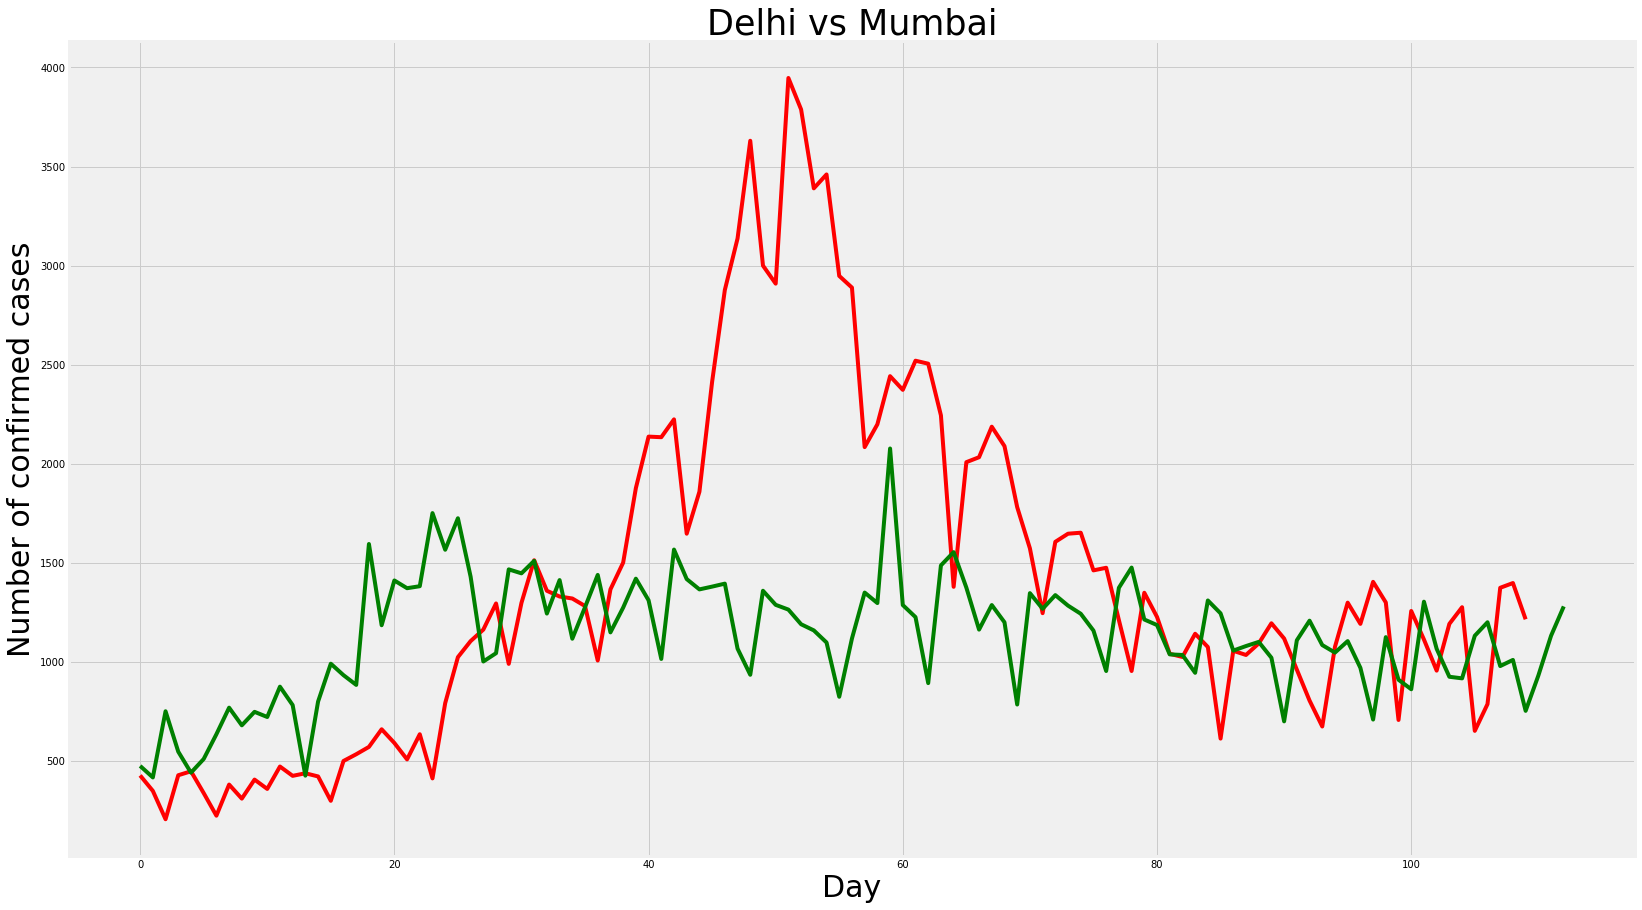

In [15]:
plt.figure(figsize= (25,15))
plt.plot(day1,s,'r')
plt.plot(day2,r,'g')
#plt.rc('font', size=25) 
#plt.rc('axes', titlesize=25) 
plt.title("Delhi vs Mumbai", fontsize=35)
plt.ylabel("Number of confirmed cases", fontsize=30)
plt.xlabel("Day",fontsize=30)


plt.show()

In [16]:
day3 = list(range(0, len(deceased)))
day4= list(range(0, len(deceased1)))

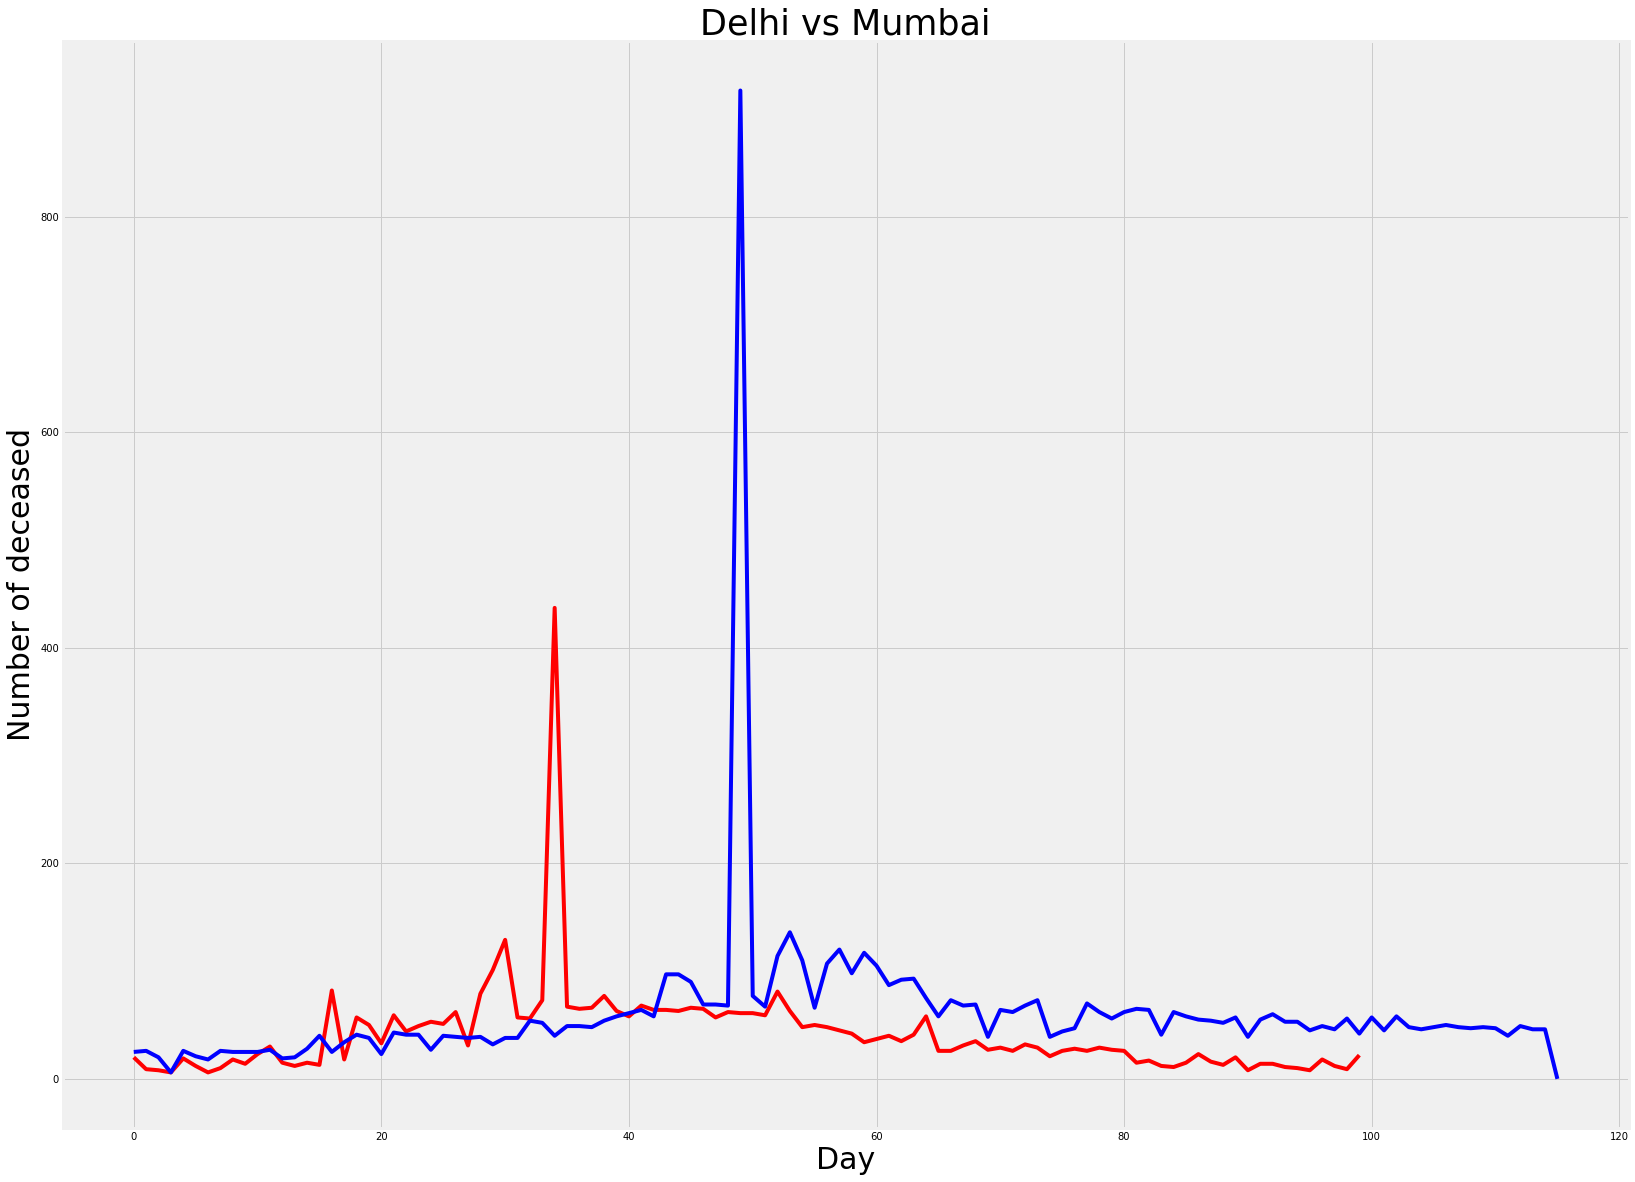

In [17]:
plt.figure(figsize= (25,20))
plt.plot(day3,deceased,'r')
plt.plot(day4,deceased1,'b')
#plt.rc('font', size=25) 
#plt.rc('axes', titlesize=25) 
plt.title("Delhi vs Mumbai", fontsize=35)
plt.ylabel("Number of deceased", fontsize=30)
plt.xlabel("Day",fontsize=30)


plt.show()

In [18]:
i=deceased1.index(max(deceased1))
deceased1.pop(i)
j=deceased.index(max(deceased))
deceased.pop(j)
day4= list(range(0, len(deceased1)))
day3= list(range(0, len(deceased)))


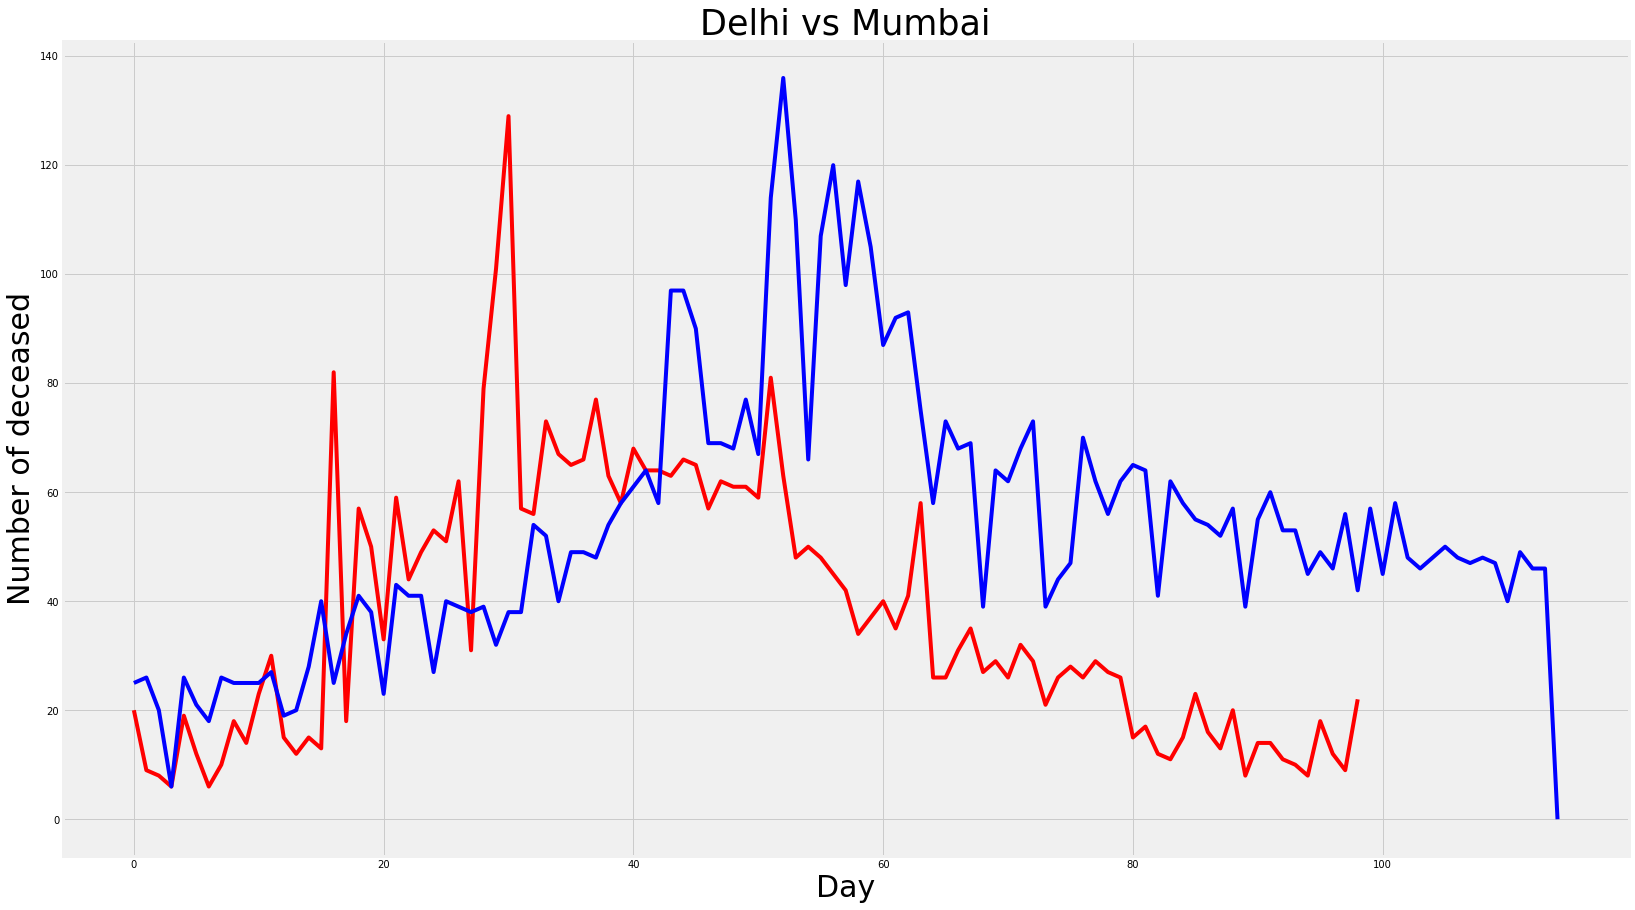

In [19]:
plt.figure(figsize= (25,15))
plt.plot(day3,deceased,'r')
plt.plot(day4,deceased1,'b')
#plt.rc('font', size=25) 
#plt.rc('axes', titlesize=25) 
plt.title("Delhi vs Mumbai", fontsize=35)
plt.ylabel("Number of deceased", fontsize=30)
plt.xlabel("Day",fontsize=30)


plt.show()